In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
from knn import load, match, recommend, prepare

/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df_movies, df_ratings = load('movies.csv','ratings.csv',1466677221)

Movies:
   movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)
Ratings
      userId  movieId  rating   timestamp
1118      14        2     4.0  1522101105
1135      14     1882     3.0  1522096642
1137      14     1917     3.5  1522101098
1142      14     2720     3.5  1522096585
1166      14     6534     3.0  1522096619
There are 35438 unique users and 47306 unique movies in this data set


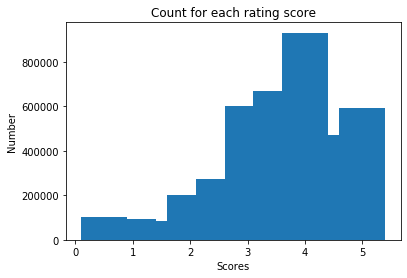

In [3]:
ratings_count = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
ratings = ratings_count[['count']].reset_index().rename(columns={'index': 'rating'})
plt.bar(ratings['rating'],ratings['count'])
plt.xlabel('Scores')
plt.ylabel('Number')

plt.title('Count for each rating score')

plt.show()

In [4]:
mat_sparse, movies = prepare(df_movies, df_ratings)

In [5]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(mat_sparse)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [6]:
recommend(knn,mat_sparse,movies,fav='Hunger Game',n=10)

Your choice: ['The Hunger Games (2012)', 'The Hungover Games (2014)']

Recommendations for Hunger Game:
Rank: 1: The Hunger Games: Catching Fire (2013)
Rank: 2: The Hunger Games: Mockingjay - Part 1 (2014)
Rank: 3: The Hunger Games: Mockingjay - Part 2 (2015)
Rank: 4: Harry Potter and the Deathly Hallows: Part 2 (2011)
Rank: 5: Harry Potter and the Deathly Hallows: Part 1 (2010)
Rank: 6: Avatar (2009)
Rank: 7: Avengers, The (2012)
Rank: 8: Harry Potter and the Half-Blood Prince (2009)
Rank: 9: Harry Potter and the Goblet of Fire (2005)
Rank: 10: Harry Potter and the Prisoner of Azkaban (2004)
